### Gaussian High-pass and Low-pass filters in frequency domain



In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal
from scipy.signal.windows import gaussian   
from matplotlib.pyplot import imshow
from PIL import Image
import cv2
from scipy import signal
from scipy.fftpack import fft2, fftshift, ifftshift, ifft2


In [27]:
new_im=cv2.imread("fantasy.jpg",0) # convert to greyscale
new_im=cv2.resize(new_im, (512,512))# first width, second height

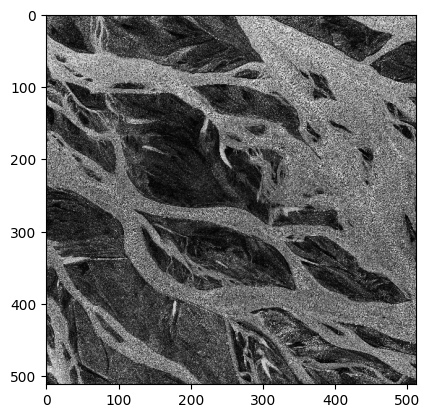

In [28]:
imshow(new_im, cmap='gray')
#new_im


### The Gaussian window is defined by $ w(n)=\exp^{\frac{-1}{2}{\frac{n}{\sigma}}^2}$ where $n$ is the number of pixels in the output window

In [29]:
# create a 2D-gaussian kernel、filter with the same size of the image
kernel = np.outer(gaussian(new_im.shape[0], 5), gaussian(new_im.shape[1], 5))# outer product of two vectors,
#each representing a 1D Gaussian window of size of 5 points

# find Fourier transform of the image f(x,y)
freq = fft2(new_im)
# generate a kernel whose origin is in the top-left corner
kern=ifftshift(kernel) # h(x,y)
# calculate FFT of the kernel
freq_kernel = fft2(kern)
# multiply in the frequency domain
product = freq*freq_kernel
# compute the final result
# take the inverse transform of the product and display the real part
im_out = ifft2(product).real # output blurred image

In [30]:
# scale image to original grey-level intensities in the range from 0 to 255
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(im_out)
im_out= scaler.transform(im_out)
im_out


array([[137.01605018, 125.7155925 , 116.25191255, ..., 165.73568433,
        163.17594957, 149.7445702 ],
       [153.07272307, 139.95790559, 128.74657867, ..., 186.03427811,
        182.96466551, 167.65756418],
       [168.17952069, 153.44822585, 140.67165671, ..., 204.8360276 ,
        201.3759517 , 184.41071581],
       ...,
       [ 93.37914834,  87.64183948,  83.53311863, ..., 108.70397113,
        108.07583932, 100.40911362],
       [106.11047388,  98.61928038,  92.81727892, ..., 125.7096348 ,
        124.41244908, 114.9335844 ],
       [121.00335409, 111.61678808, 103.99234032, ..., 145.17123683,
        143.21508165, 131.7695698 ]], shape=(512, 512))

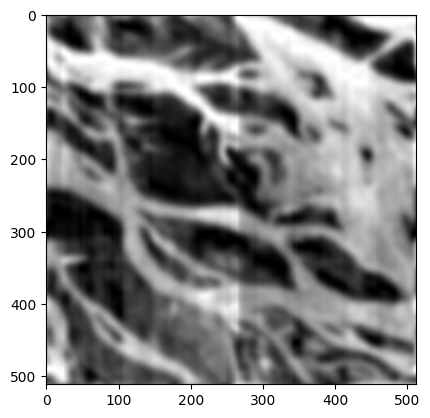

In [31]:
imshow(im_out, cmap='gray')


# Question 1: Is this a high-pass or a low-pass Gaussian filter? By modifying slightly the code above, create a 3-pixel Gaussian kernel and output the resulting image. What do you observe when you narrow the size of the Gaussian wiindow?



Text(0.5, 1.0, '3-pixel Gaussian')

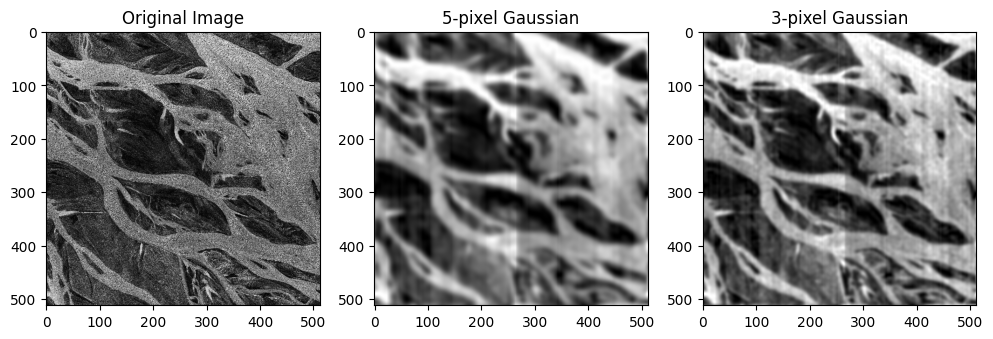

In [32]:
# type your answer here (that includes code)

# This is a low-pass Gaussian filter because it smooths/blurs the image by attenuating high frequencies

# Create a 3-pixel Gaussian kernel
kernel_3px = np.outer(gaussian(new_im.shape[0], 3), gaussian(new_im.shape[1], 3))
freq = fft2(new_im)
kern_3px = ifftshift(kernel_3px)
freq_kernel_3px = fft2(kern_3px)
product_3px = freq*freq_kernel_3px
im_out_3px = ifft2(product_3px).real

# Scale the output image
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(im_out_3px)
im_out_3px = scaler.transform(im_out_3px)

# Display the result
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(new_im, cmap='gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow(im_out, cmap='gray')
plt.title('5-pixel Gaussian')
plt.subplot(133)
plt.imshow(im_out_3px, cmap='gray')
plt.title('3-pixel Gaussian')

**Observations:**

When we narrow the size of the Gaussian window (from 5 to 3 pixels), the blurring effect becomes less pronounced because we're allowing more high frequency components to pass through. The 3-pixel kernel produces a sharper image compared to the 5-pixel kernel.

Text(0.5, 1.0, 'High-pass filtered')

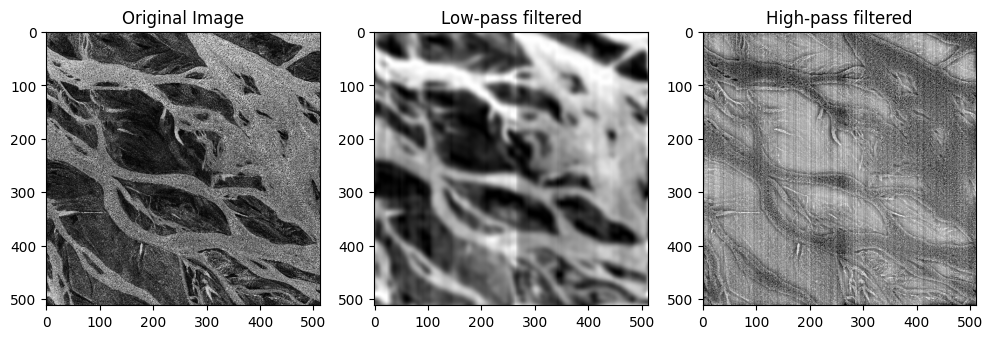

In [33]:
# high-pass Gaussian filtered image is found by subtracting low-pass filtered image from the original one

# Create a high-pass filtered image
highpass = new_im - im_out

# Scale the output image
scaler = MinMaxScaler(feature_range=(0, 255))
scaler = scaler.fit(highpass)
highpass = scaler.transform(highpass)

# Display the result
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(new_im, cmap='gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow(im_out, cmap='gray')
plt.title('Low-pass filtered')
plt.subplot(133)
plt.imshow(highpass, cmap='gray')
plt.title('High-pass filtered')

### Question 2: What would a high-pass Gaussian filter be useful for in the context of image processing?  

A high-pass Gaussian filter is particularly useful for:

1. Edge Detection: It emphasizes rapid changes in pixel intensity which correspond to edges in the image
2. Image Sharpening: By enhancing high-frequency components, it can make images appear sharper
3. Feature Extraction: Helps in identifying fine details and textures in images
4. Medical Image Processing: Can help highlight subtle changes in medical images
5. Pattern Recognition: Assists in detecting patterns by emphasizing boundaries between different regions